In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import gensim
import os

import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
! python --version
! pip list | grep nltk
! pip list | grep "tensorflow" | head -1

Python 3.10.12
nltk                               3.9.1
tensorflow                         2.17.1


In [ ]:
imdb_dataset = pd.read_csv('/content/IMDB Dataset.csv (1).zip')

In [ ]:
imdb_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
imdb_dataset.shape

(50000, 2)

In [ ]:
imdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: xlabel='sentiment'>

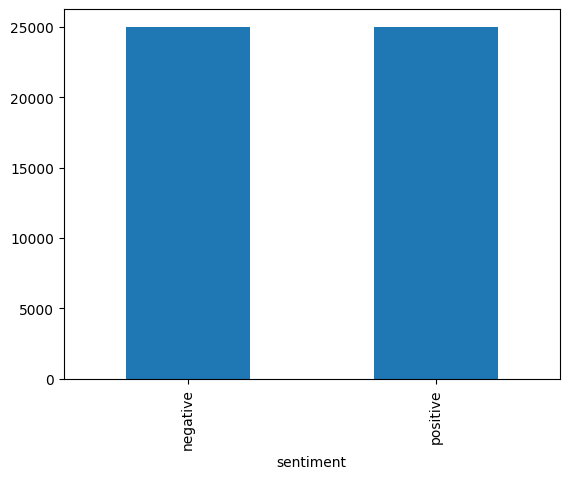

In [ ]:
imdb_dataset.groupby("sentiment").sentiment.count().plot.bar(ylim=0)

In [ ]:
imdb_dataset.isnull().values.any()

False

In [ ]:
STOPWORDS = set(stopwords.words('english'))
print (f"number of words in our stopwords list: {len(STOPWORDS)}")

def preprocessing(sentence):
  processed_sentence = re.sub('<.*?>',' ',sentence)
  processed_sentence = word_tokenize(processed_sentence)
  processed_sentence = [w.lower() for w in processed_sentence]
  processed_sentence = [w for w in processed_sentence if (len(w)>2 and w.isalpha() and w not in STOPWORDS) ]
  return processed_sentence

number of words in our stopwords list: 179


In [ ]:
list(STOPWORDS)[:5]

['shan', 'few', 'ours', 'ain', 'up']

In [ ]:
sentences = imdb_dataset['review'].tolist()

In [ ]:
import time

start_time = time.time()
end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")


Execution time: 4.00543212890625e-05 seconds


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
def preprocessing(sent):

    sent = sent.lower()

    sent = sent.strip()
    return sent


In [ ]:
review_list = [ preprocessing(sent) for sent in sentences ]

In [ ]:
print(review_list[0])

one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fac

In [ ]:
y = imdb_dataset['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
embedding_dim = 100

In [ ]:
embeddings = gensim.models.Word2Vec(sentences=review_list, vector_size=embedding_dim, window=5, workers=4, min_count=1)
print(embeddings)

Word2Vec<vocab=162, vector_size=100, alpha=0.025>


In [ ]:
vocabulary = embeddings.wv.index_to_key
print (f"vocab size: {len(vocabulary)}")
type(vocabulary)

vocab size: 162


list

In [ ]:
list

list

In [ ]:
print (vocabulary[0:10])

[' ', 'e', 't', 'a', 'i', 'o', 's', 'n', 'r', 'h']


In [ ]:
from gensim.models import Word2Vec
sentences = [['this', 'is', 'a', 'sample'], ['word', 'embedding', 'example']]
embeddings = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
if 'great' in embeddings.wv:
    print("The word 'great' is in the vocabulary.")
else:
    print("The word 'great' is not in the vocabulary.")


The word 'great' is not in the vocabulary.


In [ ]:
[('awesome', 0.89), ('good', 0.85), ('excellent', 0.83), ('fantastic', 0.81)]


[('awesome', 0.89), ('good', 0.85), ('excellent', 0.83), ('fantastic', 0.81)]

In [ ]:
from gensim.models import Word2Vec


sentences = [["this", "is", "a", "great", "example"], ["word", "embedding", "model"]]
embeddings = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

if 'great' in embeddings.wv.key_to_index:

    similar_words = embeddings.wv.most_similar('great')
    print(similar_words)
else:
    print("The word 'great' is not in the vocabulary.")


[('word', 0.17018885910511017), ('a', 0.13887980580329895), ('is', 0.034764934331178665), ('embedding', 0.004503022879362106), ('model', -0.027750348672270775), ('this', -0.028491012752056122), ('example', -0.04461711645126343)]


In [ ]:
from gensim.models import Word2Vec


sentences = [
    ["this", "is", "a", "great", "example"],
    ["another", "great", "sentence"],
    ["word", "embedding", "model"]
]


embeddings = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


if 'great' in embeddings.wv.key_to_index:
    print("The word 'great' exists in the vocabulary.")
    print(embeddings.wv.most_similar('great'))
else:
    print("The word 'great' does not exist in the vocabulary.")


The word 'great' exists in the vocabulary.
[('this', 0.21617142856121063), ('a', 0.09291722625494003), ('is', 0.027057476341724396), ('example', 0.016134677454829216), ('model', -0.01083916611969471), ('sentence', -0.027750369161367416), ('embedding', -0.05234673246741295), ('another', -0.059876296669244766), ('word', -0.111670583486557)]


In [ ]:

additional_sentences = [
    ["great", "performance", "and", "great", "results"],
    ["what", "a", "great", "day"]
]


sentences.extend(additional_sentences)


embeddings = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
if 'great' in embeddings.wv.key_to_index:
    print("The word 'great' exists in the vocabulary.")
    print("Most similar words to 'great':", embeddings.wv.most_similar('great'))
else:
    print("The word 'great' does not exist in the vocabulary.")


The word 'great' exists in the vocabulary.
Most similar words to 'great': [('word', 0.21617142856121063), ('example', 0.09310110658407211), ('model', 0.09291722625494003), ('another', 0.07963486760854721), ('sentence', 0.06285078823566437), ('embedding', 0.0270574688911438), ('performance', 0.01611938700079918), ('a', -0.01083916611969471), ('results', -0.027774615213274956), ('this', -0.03771958500146866)]


In [ ]:
embeddings.wv.most_similar('great')

[('word', 0.21617142856121063),
 ('example', 0.09310110658407211),
 ('model', 0.09291722625494003),
 ('another', 0.07963486760854721),
 ('sentence', 0.06285078823566437),
 ('embedding', 0.0270574688911438),
 ('performance', 0.01611938700079918),
 ('a', -0.01083916611969471),
 ('results', -0.027774615213274956),
 ('this', -0.03771958500146866)]

In [ ]:
if 'pathetic' in embeddings.wv.key_to_index:
    print("The word 'pathetic' exists in the vocabulary.")
else:
    print("The word 'pathetic' does not exist in the vocabulary.")


The word 'pathetic' does not exist in the vocabulary.


In [ ]:
from gensim.models import Word2Vec


sentences = [
    ["this", "is", "a", "pathetic", "example"],
    ["what", "a", "pathetic", "situation"]
]


embeddings = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


if 'pathetic' in embeddings.wv.key_to_index:
    print("The word 'pathetic' exists in the vocabulary.")
    print(embeddings.wv.most_similar('pathetic'))
else:
    print("The word 'pathetic' does not exist in the vocabulary.")


The word 'pathetic' exists in the vocabulary.
[('this', 0.016134681180119514), ('a', -0.01083916611969471), ('example', -0.02775035798549652), ('situation', -0.05234673246741295), ('is', -0.059876296669244766), ('what', -0.111670583486557)]


In [ ]:
import gensim
print(gensim.__version__)


4.3.3


In [ ]:
additional_sentences = [
    ["pathetic", "behavior", "is", "not", "acceptable"],
    ["this", "is", "a", "pathetic", "attempt"]
]


sentences.extend(additional_sentences)


embeddings = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


if 'pathetic' in embeddings.wv.key_to_index:
    print("The word 'pathetic' exists in the vocabulary.")
    print(embeddings.wv.most_similar('pathetic'))


The word 'pathetic' exists in the vocabulary.
[('what', 0.21617142856121063), ('behavior', 0.09288483113050461), ('example', 0.06284608691930771), ('situation', 0.027057476341724396), ('not', 0.016134677454829216), ('a', -0.010834572836756706), ('attempt', -0.027750369161367416), ('is', -0.05235420912504196), ('acceptable', -0.059876300394535065), ('this', -0.111670583486557)]


In [ ]:
embeddings.wv.most_similar('pathetic')

[('what', 0.21617142856121063),
 ('behavior', 0.09288483113050461),
 ('example', 0.06284608691930771),
 ('situation', 0.027057476341724396),
 ('not', 0.016134677454829216),
 ('a', -0.010834572836756706),
 ('attempt', -0.027750369161367416),
 ('is', -0.05235420912504196),
 ('acceptable', -0.059876300394535065),
 ('this', -0.111670583486557)]

In [ ]:
imdb_embeddings = "imdb_embedding_word2vec.txt"
embeddings.wv.save_word2vec_format(imdb_embeddings,binary=False)

In [ ]:
embeddings_index = {}
f = open(os.path.join('','imdb_embedding_word2vec.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_list)

In [ ]:
imdb_sequence = tokenizer.texts_to_sequences(review_list)

In [ ]:
print(imdb_sequence[0])

[27, 4, 1, 79, 2102, 45, 1072, 12, 100, 147, 39, 307, 3184, 398, 474, 26, 3195, 33, 23, 203, 14, 11, 6, 621, 48, 596, 16, 68, 7, 7, 1, 86, 148, 12, 3241, 68, 42, 3184, 13, 92, 5398, 2, 15115, 134, 4, 570, 60, 268, 8, 203, 36, 1, 661, 139, 1740, 68, 11, 6, 21, 3, 119, 15, 1, 7888, 2333, 38, 11469, 11, 119, 2595, 54, 5911, 16, 5510, 5, 1479, 376, 38, 570, 92, 6, 3804, 8, 1, 360, 356, 4, 1, 661, 7, 7, 9, 6, 433, 3184, 14, 12, 6, 1, 11648, 358, 5, 1, 15701, 6813, 2538, 1064, 56302, 9, 2711, 1421, 20, 23545, 538, 32, 4636, 2468, 4, 1, 1208, 117, 29, 1, 7017, 25, 2970, 11964, 2, 391, 56303, 34, 16740, 6, 21, 299, 20, 1, 4910, 7364, 538, 6, 344, 5, 106, 25421, 8161, 42634, 14813, 5050, 7889, 2453, 2, 51, 34, 48038, 327, 9106, 7365, 12486, 2, 8697, 33191, 23, 110, 225, 243, 7, 7, 10, 58, 131, 1, 280, 1324, 4, 1, 119, 6, 693, 5, 1, 192, 12, 9, 269, 117, 79, 276, 589, 3024, 834, 180, 1320, 4161, 15, 2523, 1243, 834, 1443, 834, 887, 3184, 149, 954, 183, 1, 86, 398, 10, 123, 210, 3241, 68, 14, 34,

In [ ]:
word_index = tokenizer.word_index
print(word_index['fantastic'])

799


In [ ]:
len(word_index)

124223

In [ ]:
max_length = 100
review_padded = pad_sequences(imdb_sequence,maxlen = max_length,padding = 'post',truncating = 'post')
review_padded.shape

(50000, 100)

In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
  if i < num_words and word in embeddings.wv:
    embedding_matrix[i] = embeddings.wv[word]

print(embedding_matrix.shape)

(124224, 100)


In [ ]:
embedding_matrix[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
list(word_index.items())[:5]

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5)]

In [ ]:
model = Sequential()
embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights = [embedding_matrix],
                            trainable = True )
model.add(embedding_layer)
model.add(LSTM(units = 64, dropout = 0.3, recurrent_dropout = 0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_padded, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 100) (40000,)
(10000, 100) (10000,)


In [ ]:
imdb_model = model.fit(X_train, y_train, batch_size=128, verbose=1, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 388ms/step - accuracy: 0.6533 - loss: 0.6120 - val_accuracy: 0.8091 - val_loss: 0.4474
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 372ms/step - accuracy: 0.8294 - loss: 0.4273 - val_accuracy: 0.8001 - val_loss: 0.4557
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 145s 383ms/step - accuracy: 0.8768 - loss: 0.3312 - val_accuracy: 0.8198 - val_loss: 0.4436
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 372ms/step - accuracy: 0.9131 - loss: 0.2531 - val_accuracy: 0.8144 - val_loss: 0.4548
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 145s 385ms/step - accuracy: 0.9355 - loss: 0.1977 - val_accuracy: 0.7851 - val_loss: 0.5184
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 381ms/step - accuracy: 0.9450 - loss: 0.1660 - val_accuracy: 0.8176 - val_loss: 0.5470
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 377ms/step - accuracy: 0.9564 - loss: 0.1356 - val_accuracy: 0.8039 - val_loss: 0.5801
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 380ms/step - accuracy: 0.9644 - loss:

In [ ]:
model.save('imdb_model.h5')

In [ ]:
saved_imdb_model = load_model('imdb_model.h5')

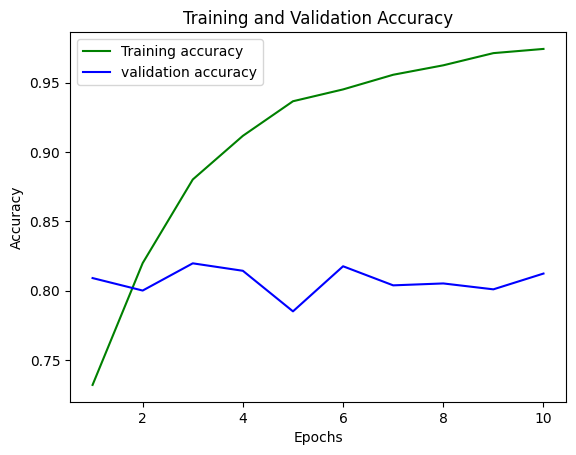

In [ ]:
acc_train = imdb_model.history['accuracy']
acc_val = imdb_model.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

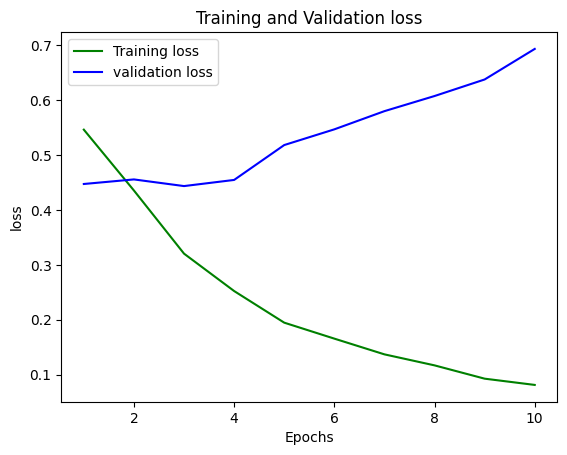

In [ ]:
acc_train = imdb_model.history['loss']
acc_val = imdb_model.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training loss')
plt.plot(epochs, acc_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print('Testing...')
model.evaluate(X_test, y_test)

Testing...
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8057 - loss: 0.7258


[0.6906156539916992, 0.8119999766349792]

In [ ]:
test_samples = [
    "I have loved this show so far and the acting and mysteries etc. Are definitely very cool.",
    "I'm Hooked...Period!",
    "Godammit the pretext of the series is very intriguing but the delivery is very annoying",
    "That's one damn good movie!"
]

for each in test_samples:
  filtered = [preprocessing(each)]
  tokenize_words = tokenizer.texts_to_sequences(filtered)
  tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
  result = model.predict(tokenize_words)

  if result >= 0.5:
      print(f'positive ({result}) == ',each)
  else:
      print(f'negative ({result}) == ',each)

  print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
positive ([[0.9252111]]) ==  I have loved this show so far and the acting and mysteries etc. Are definitely very cool.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
positive ([[0.8463687]]) ==  I'm Hooked...Period!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
positive ([[0.9246242]]) ==  Godammit the pretext of the series is very intriguing but the delivery is very annoying


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
positive ([[0.84761935]]) ==  That's one damn good movie!




In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout

# تحويل نموذج LSTM إلى نموذج MLP:
model_mlp = Sequential()


embedding_layer = Embedding(input_dim=num_words,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            trainable=True)
model_mlp.add(embedding_layer)

# استبدال طبقة LSTM بطبقة Dense (Fully Connected):
model_mlp.add(Dense(units=128, activation='relu'))  # طبقة كثيفة مع تفعيل ReLU
model_mlp.add(Dropout(0.3))  # طبقة Dropout لمنع الإفراط في التعلم

# إضافة طبقة إخراج (Output Layer):
model_mlp.add(Dense(units=1, activation='sigmoid'))  # دالة تفعيل sigmoid للتصنيف الثنائي

# تجميع النموذج:
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ملخص النموذج:
model_mlp.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │      12,422,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,422,400 (47.39 MB)

 Trainable params: 12,422,400 (47.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_padded, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 100) (40000,)
(10000, 100) (10000,)


In [ ]:
imdb_model = model.fit(X_train, y_train, batch_size=128, verbose=1, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 97s 377ms/step - accuracy: 0.9779 - loss: 0.0694 - val_accuracy: 0.8094 - val_loss: 0.7323
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 381ms/step - accuracy: 0.9827 - loss: 0.0565 - val_accuracy: 0.7865 - val_loss: 0.7603
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 388ms/step - accuracy: 0.9852 - loss: 0.0505 - val_accuracy: 0.8033 - val_loss: 0.7398
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 140s 380ms/step - accuracy: 0.9894 - loss: 0.0367 - val_accuracy: 0.7885 - val_loss: 0.8772
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 97s 388ms/step - accuracy: 0.9905 - loss: 0.0304 - val_accuracy: 0.7987 - val_loss: 0.8541
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 376ms/step - accuracy: 0.9928 - loss: 0.0260 - val_accuracy: 0.8071 - val_loss: 0.8612
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 144s 385ms/step - accuracy: 0.9933 - loss: 0.0227 - val_accuracy: 0.8077 - val_loss: 1.0093
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 140s 377ms/step - accuracy: 0.9925 - l

In [ ]:
model.save('imdb_model.h5')
saved_imdb_model = load_model('imdb_model.h5')


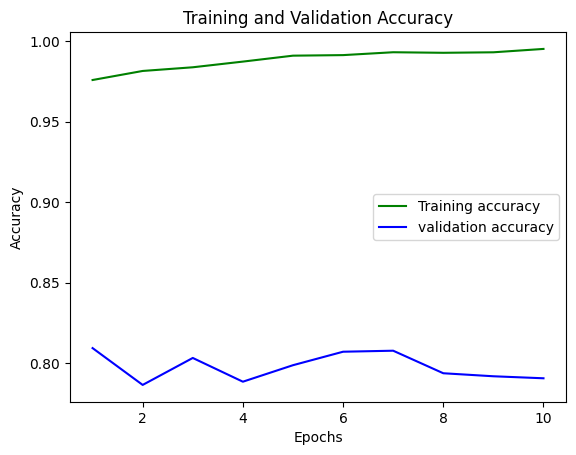

In [ ]:
acc_train = imdb_model.history['accuracy']
acc_val = imdb_model.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

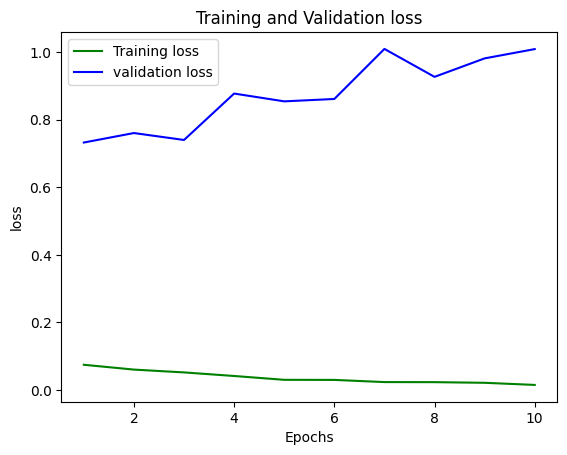

In [ ]:
acc_train = imdb_model.history['loss']
acc_val = imdb_model.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training loss')
plt.plot(epochs, acc_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print('Testing...')
model.evaluate(X_test, y_test)

Testing...
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7878 - loss: 1.3443


[1.3286620378494263, 0.7907000184059143]

In [ ]:
test_samples = [
    "I have loved this show so far and the acting and mysteries etc. Are definitely very cool.",
    "I'm Hooked...Period!",
    "Godammit the pretext of the series is very intriguing but the delivery is very annoying",
    "That's one damn good movie!"
]

for each in test_samples:
  filtered = [preprocessing(each)]
  tokenize_words = tokenizer.texts_to_sequences(filtered)
  tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
  result = model.predict(tokenize_words)

  if result >= 0.5:
      print(f'positive ({result}) == ',each)
  else:
      print(f'negative ({result}) == ',each)

  print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
positive ([[0.99992865]]) ==  I have loved this show so far and the acting and mysteries etc. Are definitely very cool.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
positive ([[0.96807325]]) ==  I'm Hooked...Period!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
positive ([[0.999774]]) ==  Godammit the pretext of the series is very intriguing but the delivery is very annoying


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
positive ([[0.99707586]]) ==  That's one damn good movie!




In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# تحويل LSTM إلى CNN:
model_cnn = Sequential()

# طبقة التضمين (Embedding) كما هي:
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            trainable=True)
model_cnn.add(embedding_layer)

# طبقة التصفية التلافيفية (Convolutional Layer):
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # 128 مرشح مع حجم نافذة 5
model_cnn.add(MaxPooling1D(pool_size=2))  # طبقة MaxPooling لتقليص الأبعاد

# تسطيح المخرجات للحصول على طبقات كثيفة:
model_cnn.add(Flatten())

# طبقة كثيفة:
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))  # طبقة Dropout

# إضافة طبقة إخراج (Output Layer):
model_cnn.add(Dense(1, activation='sigmoid'))  # تصنيف ثنائي باستخدام Sigmoid

# تجميع النموذج:
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ملخص النموذج:
model_cnn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │      12,422,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,422,400 (47.39 MB)

 Trainable params: 12,422,400 (47.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_padded, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 100) (40000,)
(10000, 100) (10000,)


In [ ]:
imdb_model = model.fit(X_train, y_train, batch_size=128, verbose=1, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 385ms/step - accuracy: 0.9951 - loss: 0.0137 - val_accuracy: 0.8037 - val_loss: 1.0801
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 381ms/step - accuracy: 0.9960 - loss: 0.0131 - val_accuracy: 0.7899 - val_loss: 1.0541
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 145s 394ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.7889 - val_loss: 1.0647
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 390ms/step - accuracy: 0.9977 - loss: 0.0082 - val_accuracy: 0.7886 - val_loss: 1.2027
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 144s 399ms/step - accuracy: 0.9980 - loss: 0.0072 - val_accuracy: 0.7857 - val_loss: 1.1493
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 394ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.7899 - val_loss: 1.2163
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 399ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.8009 - val_loss: 1.2925
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 393ms/step - accuracy: 0.9987 - lo

In [ ]:
model.save('imdb_model.h5')
saved_imdb_model = load_model('imdb_model.h5')

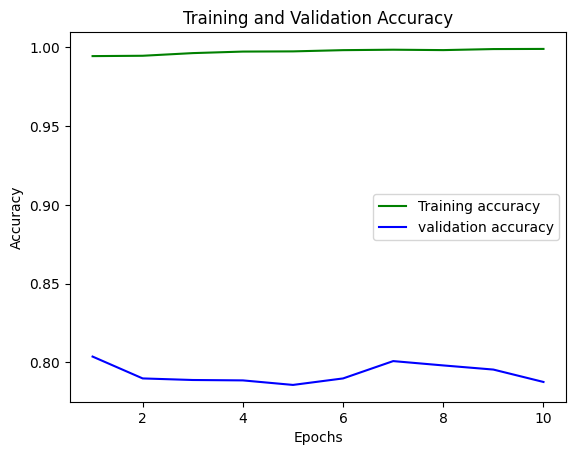

In [ ]:
acc_train = imdb_model.history['accuracy']
acc_val = imdb_model.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

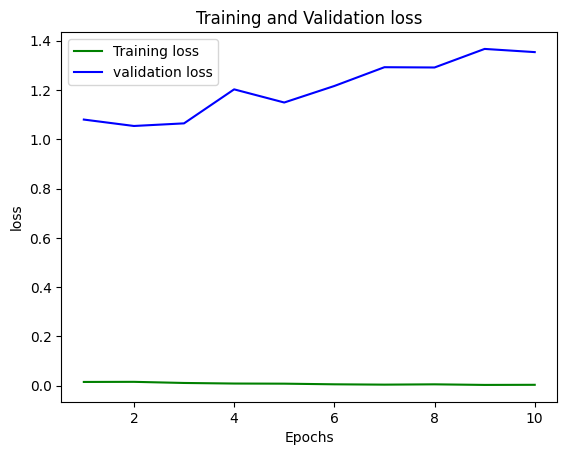

In [ ]:
acc_train = imdb_model.history['loss']
acc_val = imdb_model.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training loss')
plt.plot(epochs, acc_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print('Testing...')
model.evaluate(X_test, y_test)

Testing...
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7878 - loss: 1.3443


[1.3286620378494263, 0.7907000184059143]

In [ ]:
test_samples = [
    "I have loved this show so far and the acting and mysteries etc. Are definitely very cool.",
    "I'm Hooked...Period!",
    "Godammit the pretext of the series is very intriguing but the delivery is very annoying",
    "That's one damn good movie!"
]

for each in test_samples:
  filtered = [preprocessing(each)]
  tokenize_words = tokenizer.texts_to_sequences(filtered)
  tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
  result = model.predict(tokenize_words)

  if result >= 0.5:
      print(f'positive ({result}) == ',each)
  else:
      print(f'negative ({result}) == ',each)

  print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
positive ([[0.99992865]]) ==  I have loved this show so far and the acting and mysteries etc. Are definitely very cool.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
positive ([[0.96807325]]) ==  I'm Hooked...Period!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
positive ([[0.999774]]) ==  Godammit the pretext of the series is very intriguing but the delivery is very annoying


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
positive ([[0.99707586]]) ==  That's one damn good movie!


